# Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from functions import functions as f
# import model
from sklearn.naive_bayes import GaussianNB

# Import data

In [2]:
df = pd.read_csv('../data/crashes_cleaned_ohe.csv')

In [3]:
df.head()

,posted_speed_limit,num_units,sex,age,weather_condition_blowing snow,weather_condition_clear,weather_condition_cloudy/overcast,weather_condition_fog/smoke/haze,weather_condition_freezing rain/drizzle,weather_condition_rain,...,crash_month_4,crash_month_5,crash_month_6,crash_month_7,crash_month_8,crash_month_9,crash_month_10,crash_month_11,crash_month_12,serious_accident
0,35,2,1,44.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,25,2,1,71.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,15,2,1,60.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,30,2,1,38.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,2,1,52.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Train-Test Split

In [4]:
X = df.drop(['serious_accident'], axis=1)
y = df.serious_accident

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=200)

In [5]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

## Balance the imbalaced data

In [6]:
balance = SMOTE()
X_train_scaled_balanced, y_train_balanced = balance.fit_sample(X_train_scaled, y_train)

# Run Model

In [7]:
gnb = GaussianNB()
gnb.fit(X_train_scaled_balanced, y_train_balanced)

GaussianNB()

# Predict

In [8]:
predictions_from_X_train = gnb.predict(X_train_scaled_balanced)
predictions_from_X_test = gnb.predict(X_test_scaled)

## Variable Tracker

- X_train &rarr; X_train_scaled &rarr; **X_train_scaled_balanced**
    - used to create **predictions_from_X_train** which is to be compared to **y_train_balanced**
- X_test &rarr; **X_test_scaled**
    - used to create **predictions_from_X_test** which is to be compared to **y_test**
- y_train &rarr; **y_train_balanced**
- **y_test**

# Scoring

## Train Scoring

Accuracy: 53.2%
Precision: 51.7%
Recall: 97.5%
F1: 67.6%
Conufusion Matrix: 
[[ 3899 39861]
 [ 1079 42681]]




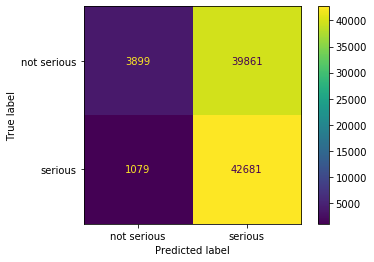

In [9]:
f.scoring(predictions_from_X_train, y_train_balanced, gnb, X_train_scaled_balanced)

## Test Scoring

Accuracy: 10.3%
Precision: 1.9%
Recall: 89.9%
F1: 3.8%
Conufusion Matrix: 
[[ 947 9979]
 [  22  196]]




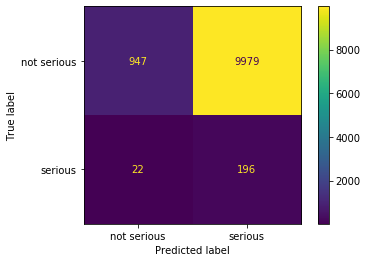

In [10]:
f.scoring(predictions_from_X_test, y_test, gnb, X_test_scaled)

## Add Scores to Scoring Dataframe

In [11]:
f.add_scores_to_scoring_df("Naive Bayes", y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train)